In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**TRAIN DATASET**

In [2]:
train=pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Finding the NULL values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Percentage of NULL values in train data set
train.isnull().sum()*100/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
#Finding the duplicate rows in the train dataset
duplicate_rows_train=train[train.duplicated()]
duplicate_rows_train.shape

(0, 12)

**Handling Missing Values**

In [10]:
#Making to new column 'Age Null'. if in Age Null is present then 1 or 0
train['Age_Null']=np.where(train['Age'].isnull(),1,0)

In [11]:
#Finding Median of Age
median=train.Age.median()
median

28.0

In [12]:
#Filling Nan values present in Age with median
train['Age']=train['Age'].fillna(median)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
#Making to new column 'cabin Null'. if in Cabin Null is present then 1 or 0
train['Cabin_Null']=np.where(train['Cabin'].isnull(),1,0)

In [14]:
#Filling Nan values present in Cabin with Label "Missing"
train['Cabin'].fillna('Missing',inplace=True)

In [15]:
#Taking only First Letter of the Label in Cabin
train['Cabin']=train['Cabin'].str[0]

In [16]:
train['Cabin'].head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [17]:
#train.Cabin.unique()

In [18]:
#train.groupby(['Cabin'])['Survived'].mean()

In [19]:
#ordinal_labels=train.groupby(['Cabin'])['Survived'].mean().sort_values().index
#ordinal_labels

In [20]:
#enumerate(ordinal_labels,0)

In [21]:
#ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
#ordinal_labels2

In [22]:
#train['Cabin_ordinal_label']=train['Cabin'].map(ordinal_labels2)
#train.head()

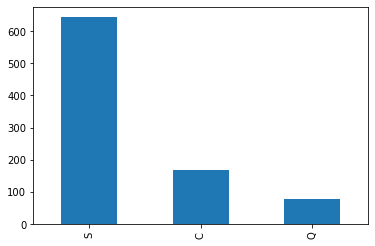

In [23]:
train['Embarked'].value_counts().plot.bar()

In [24]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
#Filling Nan values present in Embarked with Most Common Label "S"
train['Embarked'].fillna('S',inplace=True)

In [26]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_Null       0
Cabin_Null     0
dtype: int64

In [27]:
#No.of Unique values in train dataset
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin            9
Embarked         3
Age_Null         2
Cabin_Null       2
dtype: int64

In [28]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
train['Age']=train['Age'].astype(int)

In [30]:
# Classifing Age Groups
def age(df):
    df.loc[train['Age']<=17,'Age']=1                        #Baby and unmatured
    df.loc[(train['Age']>17) & (train['Age']<=39),'Age']=2   #Young Age Adult
    df.loc[(train['Age']>39) & (train['Age']<=59),'Age']=3    #Middle Age Adult
    df.loc[(train['Age']>59),'Age']=4                    #Old Adult
    return df
age(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,M,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,M,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,M,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2,0,0,211536,13.0000,M,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,2,0,0,112053,30.0000,B,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,23.4500,M,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,2,0,0,111369,30.0000,C,C,0,0


In [31]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Null',
       'Cabin_Null'],
      dtype='object')

**BAR PLOTs for Categorical Variables**

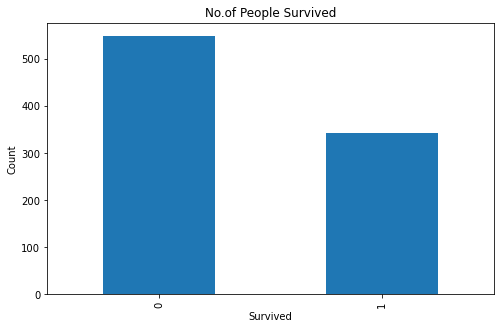

In [35]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
train['Survived'].value_counts().plot.bar()

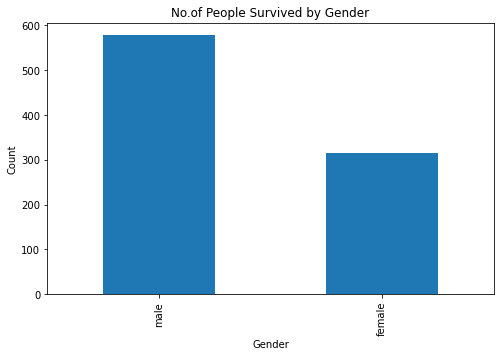

In [36]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
train['Sex'].value_counts().plot.bar()


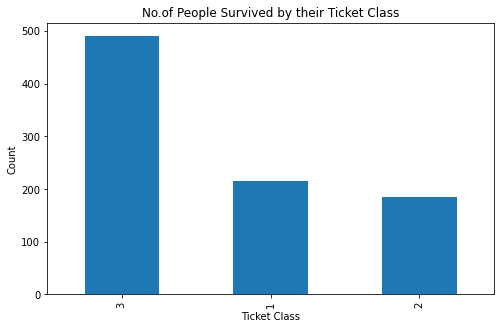

In [37]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
train['Pclass'].value_counts().plot.bar()

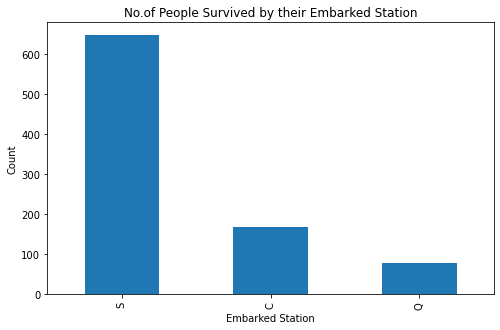

In [38]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Embarked Station')
plt.xlabel('Embarked Station')
plt.ylabel('Count')
train['Embarked'].value_counts().plot.bar()

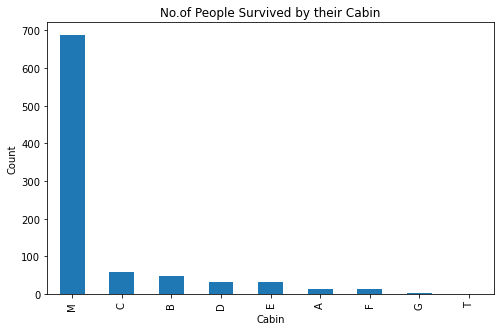

In [39]:
plt.figure(figsize=(8,5))
plt.title('No.of People Survived by their Cabin')
plt.xlabel('Cabin')
plt.ylabel('Count')
train['Cabin'].value_counts().plot.bar()

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train["Sex"]=labelencoder.fit_transform(train['Sex'])
train['Embarked']=labelencoder.fit_transform(train['Embarked'])
train['Cabin']=labelencoder.fit_transform(train['Cabin'])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
 12  Age_Null     891 non-null    int64  
 13  Cabin_Null   891 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 97.6+ KB


In [42]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Null',
       'Cabin_Null'],
      dtype='object')

In [44]:
columns_to_convert=['Survived', 'Pclass', 'Sex', 'Age','Embarked','Cabin', 'Age_Null', 'Cabin_Null']
for i in columns_to_convert:
    train[i]=train[i].astype(str)

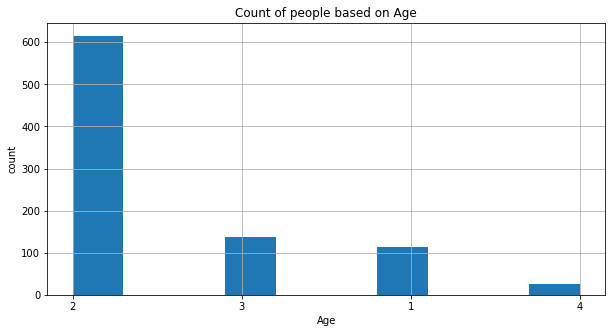

In [45]:
#Histogram of Age 
train['Age'].hist(figsize=(10,5))
plt.title("Count of people based on Age")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [46]:
#Crosstab for no.of people Survived based on Age 
Age_survived=pd.crosstab(train.Age,train.Survived,normalize='index').round(4)*100
Age_survived

Survived,0,1
Age,,
1,46.02,53.98
2,64.23,35.77
3,60.58,39.42
4,73.08,26.92


<Figure size 1080x576 with 0 Axes>

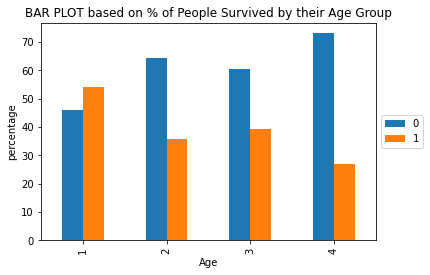

In [47]:
#graph for Survived by Age
plt.figure(figsize=(15,8))
Age_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Age Group")
plt.ylabel('percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


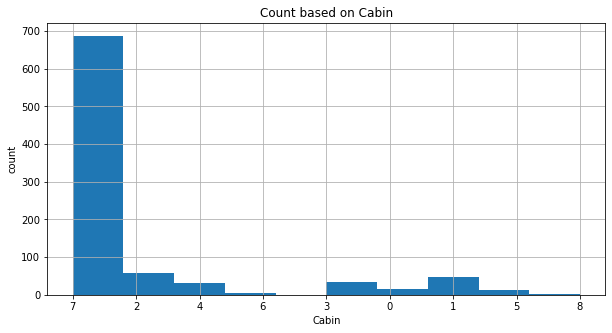

In [48]:
#Histogram for Cabin
train['Cabin'].hist(figsize=(10,5))
plt.title("Count based on Cabin")
plt.xlabel('Cabin')
plt.ylabel('count')
plt.show()

In [49]:
#Crosstab for no.of people Survived based Cabin
Cabin_survived=pd.crosstab(train.Cabin,train.Survived,normalize='index').round(4)*100
Cabin_survived

Survived,0,1
Cabin,,
0,53.33,46.67
1,25.53,74.47
2,40.68,59.32
3,24.24,75.76
4,25.00,75.00
5,38.46,61.54
6,50.00,50.00
7,70.01,29.99
8,100.00,0.00


<Figure size 720x360 with 0 Axes>

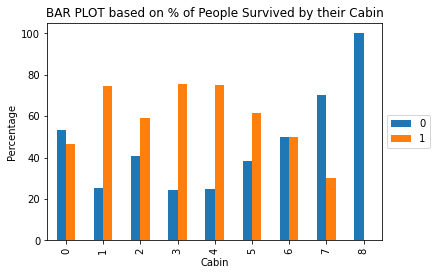

In [50]:
#graph for Survived by Cabin
plt.figure(figsize=(10,5))
Cabin_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Cabin")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

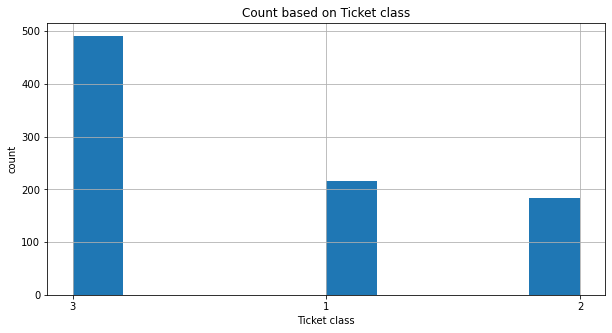

In [51]:
#Histogram for Ticket class 
train['Pclass'].hist(figsize=(10,5))
plt.title("Count based on Ticket class")
plt.xlabel('Ticket class')
plt.ylabel('count')
plt.show()

In [52]:
#Crosstab for no.of people Survived based on Ticket Class 
Class_survived=pd.crosstab(train.Pclass,train.Survived,normalize='index').round(4)*100
Class_survived

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


<Figure size 720x360 with 0 Axes>

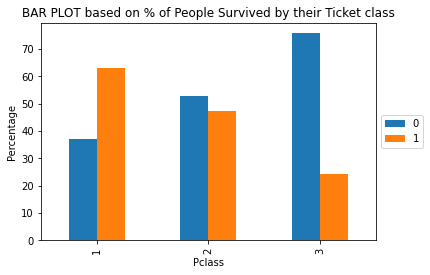

In [53]:
#graph for Survived by Ticket Class
plt.figure(figsize=(10,5))
Class_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Ticket class")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

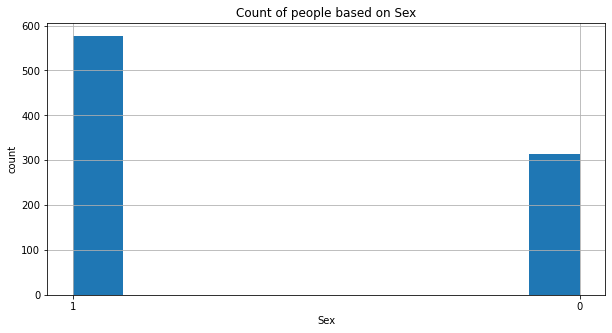

In [54]:
#Histogram of Age 
train['Sex'].hist(figsize=(10,5))
plt.title("Count of people based on Sex")
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

In [55]:
#Crosstab for no.of people Survived based on Sex 
Sex_survived=pd.crosstab(train.Sex,train.Survived,normalize='index').round(4)*100
Sex_survived

Survived,0,1
Sex,,
0,25.80,74.20
1,81.11,18.89


<Figure size 720x360 with 0 Axes>

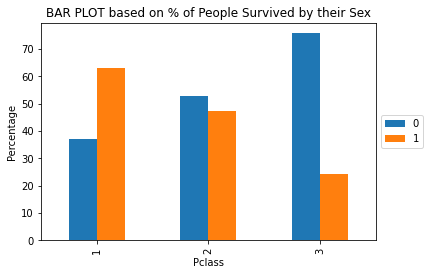

In [56]:
#graph for Survived by Ticket Class
plt.figure(figsize=(10,5))
Class_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Sex")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

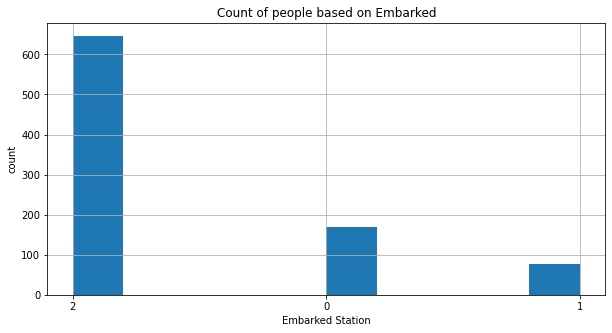

In [57]:
#Histogram of Age 
train['Embarked'].hist(figsize=(10,5))
plt.title("Count of people based on Embarked")
plt.xlabel('Embarked Station')
plt.ylabel('count')
plt.show()

In [58]:
#Crosstab for no.of people Survived based on Embarked Station 
Embarked_survived=pd.crosstab(train.Embarked,train.Survived,normalize='index').round(4)*100
Embarked_survived

Survived,0,1
Embarked,,
0,44.64,55.36
1,61.04,38.96
2,66.10,33.90


<Figure size 720x360 with 0 Axes>

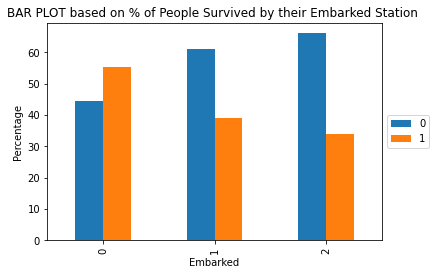

In [59]:
#graph for Survived by Embarked Station 
plt.figure(figsize=(10,5))
Embarked_survived.plot.bar()
plt.title("BAR PLOT based on % of People Survived by their Embarked Station ")
plt.ylabel("Percentage")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_Null     891 non-null    object 
 13  Cabin_Null   891 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 97.6+ KB


In [61]:
#Removing Unwanted Columns
train=train.drop(['Name','Ticket','PassengerId'],axis=1)

In [62]:
#correlation : Measures the strength of the linear relationship b/w Continuous variables
train_corr=train.corr()
train_corr

,SibSp,Parch,Fare
SibSp,1.000000,0.414838,0.159651
Parch,0.414838,1.000000,0.216225
Fare,0.159651,0.216225,1.000000


***HYPOTHESIS TESTING***

In [63]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Age_Null', 'Cabin_Null'],
      dtype='object')

In [73]:
train1=pd.DataFrame(train,columns=['Survived', 'Pclass', 'Sex', 'Age','Embarked', 'Cabin','Age_Null','Cabin_Null'])

In [74]:
columns_to_convert=['Survived', 'Pclass', 'Sex', 'Age','Embarked', 'Cabin','Age_Null','Cabin_Null']
for i in columns_to_convert:
    train1[i]=train1[i].astype(int)

In [75]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   Embarked    891 non-null    int64
 5   Cabin       891 non-null    int64
 6   Age_Null    891 non-null    int64
 7   Cabin_Null  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


In [76]:
import scipy.stats as stats
chi2,p,dof,ex=stats.chi2_contingency(train1)
print(p)

1.0


In [77]:
if p<=0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


**TEST DATASET**

In [78]:
test=pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
test.shape

(418, 11)

In [80]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [82]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
#Percentage of NULL values in test data set
test.isnull().sum()*100/len(test)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [84]:
#Finding the duplicate rows in test dataset 
duplicate_rows_test=test[test.duplicated()]
duplicate_rows_test.shape

(0, 11)

In [85]:
#Making to new column 'Age Null'. if in Age Null is present then 1 or 0
test['Age_Null']=np.where(test['Age'].isnull(),1,0)

In [86]:
#Finding Median of Age
median=test.Age.median()
median

27.0

In [87]:
#Filling Nan values present in Age with median
test['Age']=test['Age'].fillna(median)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [107]:
#creating cabin_null by cabin if null is ture 1 or 0
test['Cabin_null']=np.where(test['Cabin'].isnull(),1,0)

In [89]:
#Filling Nan values present in Cabin with Label "Missing"
test['Cabin'].fillna('Missing',inplace=True)

In [90]:
test['Cabin']=test['Cabin'].astype(str).str[0]


In [93]:
test['Fare'].median()

14.4542

In [94]:
test['Fare'].fillna('14.4542',inplace=True)

In [95]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_Null       0
cabin_null     0
dtype: int64

In [96]:
test['Age'].describe()

count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [97]:
train['Age']=train['Age'].astype(int)

In [98]:
# Classifing Age Groups
def age(df):
    df.loc[test['Age']<=17,'Age']=1                        #Baby and unmatured
    df.loc[(test['Age']>17) & (test['Age']<=39),'Age']=2   #Young Age Adult
    df.loc[(test['Age']>39) & (test['Age']<=59),'Age']=3    #Middle Age Adult
    df.loc[(test['Age']>59),'Age']=4                    #Old Adult
    return df
age(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Null,cabin_null
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,M,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.0,1,0,363272,7,M,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,4.0,0,0,240276,9.6875,M,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,M,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,M,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,2.0,0,0,A.5. 3236,8.05,M,S,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,2.0,0,0,PC 17758,108.9,C,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,2.0,0,0,SOTON/O.Q. 3101262,7.25,M,S,0,1
416,1308,3,"Ware, Mr. Frederick",male,2.0,0,0,359309,8.05,M,S,1,1


In [99]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test["Sex"]=labelencoder.fit_transform(test['Sex'])
test['Embarked']=labelencoder.fit_transform(test['Embarked'])
test['Cabin']=labelencoder.fit_transform(test['Cabin'])

In [100]:
#Removing Unwanted Columns
test=test.drop(['Name','Ticket','PassengerId'],axis=1)

In [101]:
columns_to_convert=[ 'Pclass', 'Sex', 'Age','Embarked', 'cabin_null']
for i in columns_to_convert:
    test[i]=test[i].astype(str)

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pclass      418 non-null    object
 1   Sex         418 non-null    object
 2   Age         418 non-null    object
 3   SibSp       418 non-null    int64 
 4   Parch       418 non-null    int64 
 5   Fare        418 non-null    object
 6   Cabin       418 non-null    int64 
 7   Embarked    418 non-null    object
 8   Age_Null    418 non-null    int64 
 9   cabin_null  418 non-null    object
 10  Cabin_null  418 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 36.0+ KB


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    object 
 1   Pclass      891 non-null    object 
 2   Sex         891 non-null    object 
 3   Age         891 non-null    int64  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    object 
 8   Embarked    891 non-null    object 
 9   Age_Null    891 non-null    object 
 10  Cabin_Null  891 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 76.7+ KB


In [109]:
train['Age']=train['Age'].astype(str)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    object 
 1   Pclass      891 non-null    object 
 2   Sex         891 non-null    object 
 3   Age         891 non-null    object 
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    object 
 8   Embarked    891 non-null    object 
 9   Age_Null    891 non-null    object 
 10  Cabin_Null  891 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 76.7+ KB


****Spliting Independent and Dependent Variable****

In [111]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Null,Cabin_Null
0,0,3,1,2,1,0,7.2500,7,2,0,1
1,1,1,0,2,1,0,71.2833,2,0,0,0
2,1,3,0,2,0,0,7.9250,7,2,0,1
3,1,1,0,2,1,0,53.1000,2,2,0,0
4,0,3,1,2,0,0,8.0500,7,2,0,1


In [112]:
train_y=train.iloc[:,:1]
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [113]:
train_x=train.iloc[:,1:]
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Null,Cabin_Null
0,3,1,2,1,0,7.2500,7,2,0,1
1,1,0,2,1,0,71.2833,2,0,0,0
2,3,0,2,0,0,7.9250,7,2,0,1
3,1,0,2,1,0,53.1000,2,2,0,0
4,3,1,2,0,0,8.0500,7,2,0,1
